#1 - Perkenalan

---



Nama : Andik Al Fauzi

Batch : FTDS-RMT-018

Dataset : *Uber and Lyft Dataset Boston, MA*

Objective : Membuat prediksi harga perjalanan untuk sewa layanan `Lyft` dan `Uber` berdasarkan jarak yang ditempuh

In [1]:
# Installing kaggle library
!pip install kaggle

# Installing Feature-Engine Library
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2 - Import Libraries

---



In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle
import json
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OrdinalEncoder

#3 - Data Loading

---



In [3]:
# persiapan Data Loading dan set kaggle
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle
!cp /content/drive/MyDrive/Haktiv8/kaggle.json ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
# Cek kaggle berhasil berhasil dijalankan
!ls ~/.kaggle

kaggle.json


In [5]:
# Get dataset from kaggle
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

uber-and-lyft-dataset-boston-ma.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# Extract dataset kaggle
!unzip -q /content/uber-and-lyft-dataset-boston-ma.zip

replace rideshare_kaggle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
# Read dataset kaggle
data = pd.read_csv('/content/rideshare_kaggle.csv')

In [8]:
# Make a copy dataset
copyData = data.copy()

In [9]:
# Display data for beginning insight
copyData

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Terdapat `693.071` baris data didalam dataset

In [10]:
# Check Data
copyData.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Data diambil pada Bulan November dan Desember, dengan maximal nilai `price` 97.50, `distance` rata-rata 2.16 dan surge_multiplier rata-rata `1.00`

In [11]:
# Get info data : column name and total row
copyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

ada 57 kolom di dataset

#4 - Exploratory Data Analysis (EDA)

---



Pada bagian ini kita akan melihat persebaran dataset dan juga ingin melihat proporsi antara kolom `distance` dengan `price`

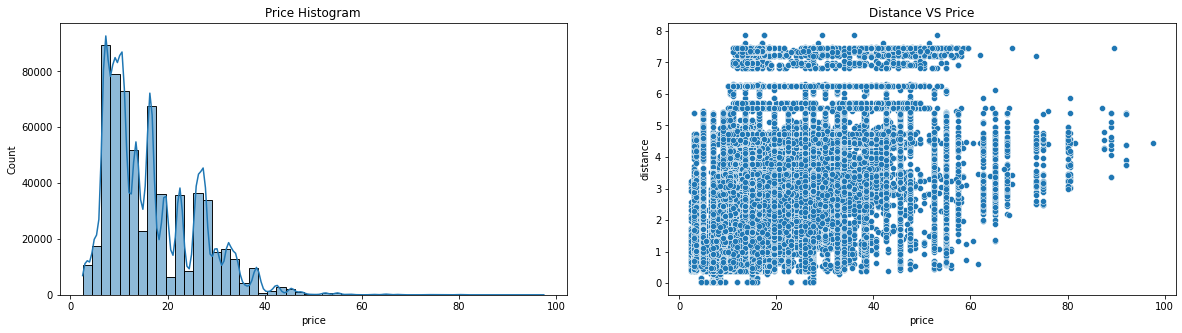

In [12]:
# Create Histogram dan Plot
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(copyData['price'], kde=True, bins=50)
plt.title('Price Histogram')

plt.subplot(1, 2, 2)
sns.scatterplot(x='price', y='distance', data=copyData)
plt.title('Distance VS Price')
plt.show()

Note : Dapat dilihat pada grafik diatas pada bulan *November* dan *December* data `price` cenderung tidak normal dengan *Right Extreme Skewness*. Dan terdapat hubungan antara `Distance` dengan `price` yang berarti jika semakin jauh perjalanan maka harga yang dibayarkan semakin tinggi.

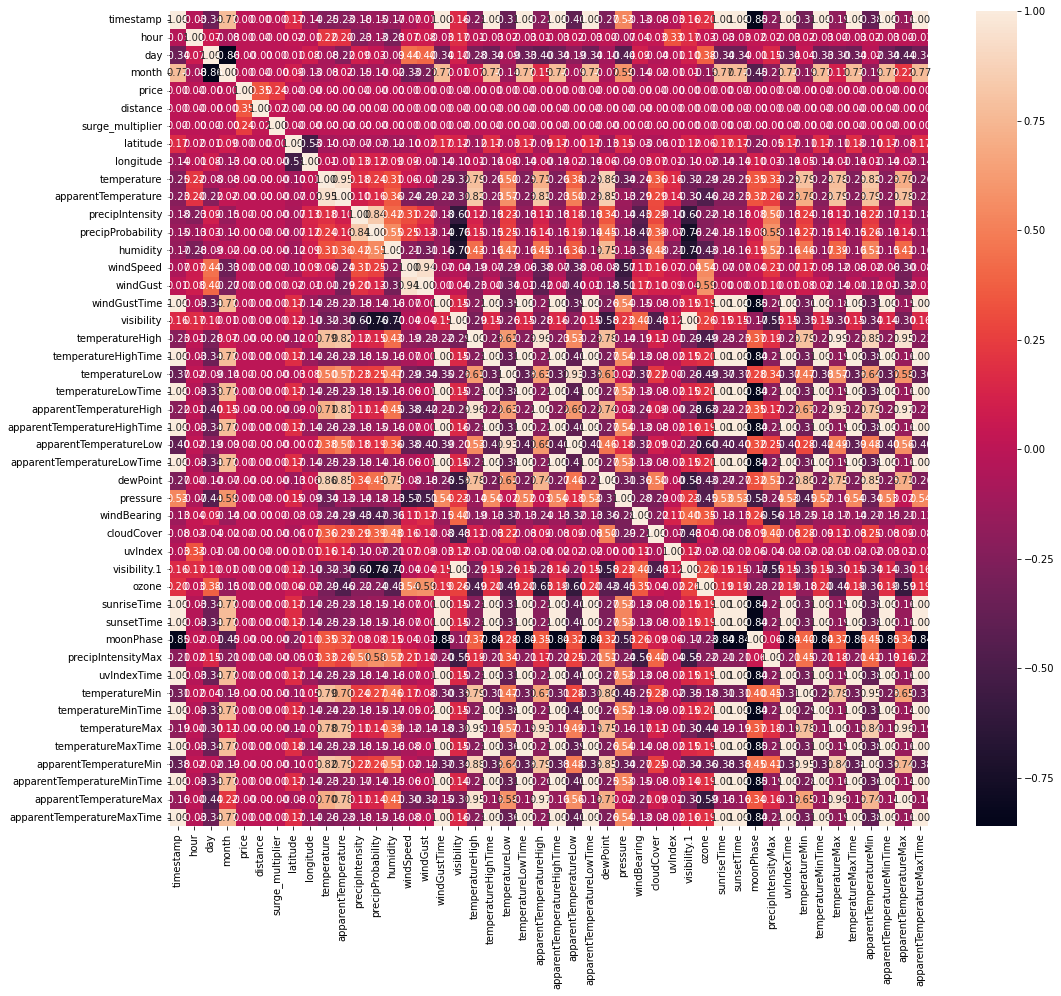

In [13]:
# Correlation Visualization
plt.figure(figsize=(17,15))
sns.heatmap(copyData.corr(), annot=True, fmt='.2f')
plt.show()

Berdasarkan data korelasi diatas untuk `price` dan `distance` ada korelasi sebesar **35%**

In [14]:
# Check Missing Value
copyData.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

ada `55,095` missing value di kolom `price` yang akan di*handling* kemudian

In [15]:
# Check mean price
meanPrice = copyData.groupby(['cab_type'])['price'].mean().to_frame().reset_index()
meanPrice

,cab_type,price
0,Lyft,17.351396
1,Uber,15.795343


Harga rata-rata untuk layanan *Lyft* yaitu `17.351396` dan *Uber* yaitu `15.795343`

In [16]:
# Check total distance
totalDistance = copyData.groupby(['cab_type'])['distance'].sum().to_frame().reset_index()
totalDistance

,cab_type,distance
0,Lyft,672293.79
1,Uber,845136.48


Total `distance` selama bulan November - Desember untuk *Lyft* yaitu `672293.79` dan untuk *Uber* yaitu `845136.48`

#5 - Feature Engineering

---



## 5.1 Split data between X (Features) and y (Target)

In [17]:
# Split between X and y 
X = copyData.drop(['price'], axis=1)
y = copyData['price']
X

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [18]:
print('Banyak dataset X : ', X.shape)
print('Banyak dataset y : ', y.shape)

Banyak dataset X :  (693071, 56)
Banyak dataset y :  (693071,)


## 5.2 Missing Value Handling

Kita akan menghandle missing value dengan teknik *Random Sample Imputation*. Saya berasumsi karena untuk kolom `price` yang *missing* ini dikarenakan ada pengguna yang langsung order layanan *on the spot* tanpa menggunakan aplikasi yang disediakan, sehingga data harga tidak masuk ke dalam *database*

In [19]:
# Check missing value data
X.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

Tidak ada missing value di data X

In [20]:
# Check total missing value data test
y.isnull().sum()

55095

missing value di data test sebanyak **55,095**

In [21]:
# Create dataframe data y
y = pd.DataFrame(y)
y

,price
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0
...,...
693066,13.0
693067,9.5
693068,NaN
693069,27.0


In [22]:
# Handling Missing Value with Random Sample Imputation
def imputeRand(df, variable):
  df[variable+'_random'] = df[variable]

  randomSample = y[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  randomSample.index = df[df[variable].isnull()].index
  df.loc[df[variable].isnull(), variable+'_random'] = randomSample

  return df

In [23]:
# Impute into price column
y = imputeRand(y, 'price')

# Drop kolom price
y = y.drop(['price'], axis=1)

# View data
y.head(10)

,price_random
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0
5,16.5
6,10.5
7,16.5
8,3.0
9,27.5


In [24]:
y.isnull().sum()

price_random    0
dtype: int64

*Missing Value* telah berhasil di imputasi dan data di kolom `price` telah dihapus dan diganti *missing value*nya dengan kolom `price_random` dengan teknik imputasi *Random Forest*

## 5.3 Split data for Train-Set and Test-Set

In [25]:
# Split between train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=19)

print('Train Size   : ', X_train.shape)
print('Test Size    : ', X_test.shape)
print('Y Train Size : ', y_train.shape)
print('Y Test Size  : ', y_test.shape)
X_train

Train Size   :  (554456, 56)
Test Size    :  (138615, 56)
Y Train Size :  (554456, 1)
Y Test Size  :  (138615, 1)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
59252,947def45-29b7-4676-b5c5-849fb876990b,1.543712e+09,0,2,12,2018-12-02 00:52:59,America/New_York,Financial District,Haymarket Square,Lyft,...,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
309399,2211e4d9-d321-4389-ab80-dc4d32bc416f,1.543277e+09,0,27,11,2018-11-27 00:03:14,America/New_York,Fenway,Financial District,Uber,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
640729,e1144038-93e7-491b-b2ca-e8cabca07e57,1.543531e+09,22,29,11,2018-11-29 22:38:06,America/New_York,North End,Theatre District,Uber,...,0.0000,1543510800,35.07,1543550400,44.68,1543510800,30.92,1543550400,38.34,1543510800
492712,7cdb151a-e110-4d25-8811-9a76b1e2c831,1.544708e+09,13,13,12,2018-12-13 13:25:09,America/New_York,North End,Financial District,Uber,...,0.0001,1544716800,18.05,1544688000,33.92,1544731200,13.60,1544688000,32.95,1544734800
356244,044ee41f-8f5b-4423-ab4e-a2847301cfdc,1.544941e+09,6,16,12,2018-12-16 06:10:11,America/New_York,Boston University,Beacon Hill,Uber,...,0.1246,1544979600,38.94,1544954400,43.78,1544990400,33.76,1545019200,38.39,1544986800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480168,820f704b-5600-4acf-91b0-6b7295cab3b5,1.543887e+09,1,4,12,2018-12-04 01:27:59,America/New_York,Back Bay,South Station,Lyft,...,0.0004,1543852800,42.86,1543896000,57.08,1543852800,39.54,1543896000,56.41,1543852800
623970,0f010f5f-7997-4fde-b966-c31c800d1bc2,1.543291e+09,4,27,11,2018-11-27 04:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1227,1543251600,40.35,1543233600,46.59,1543255200,36.96,1543291200,43.97,1543251600
82677,1f05ee49-7832-4cb0-bbf2-ab8a37fe3a6e,1.543609e+09,20,30,11,2018-11-30 20:23:09,America/New_York,South Station,Beacon Hill,Lyft,...,0.0004,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1543600800
207470,7640caef-dc2b-4d16-a4db-a7c82ab42751,1.543852e+09,15,3,12,2018-12-03 15:42:59,America/New_York,Beacon Hill,South Station,Lyft,...,0.0004,1543852800,42.91,1543896000,57.04,1543852800,39.59,1543896000,56.37,1543852800


Data di *Train-set* sebanyak 80% dengan total `554,456` dan di data *Test* sebanyak 20% dengan total `138,615`

## 5.4 Outlier Handling

Pada bagian ini kita akan menghandling outlier jika pada data *Train-Set* dan *Test-Set* terdapat outlier

In [26]:
# Function Visualization
def diagnostic_plots(df, variable):
  plt.figure(figsize=(16, 5))

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(df[variable], bins=30)
  plt.title('Histogram')

  # Boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(y = df[variable])
  plt.title('Boxplot')

  plt.show()

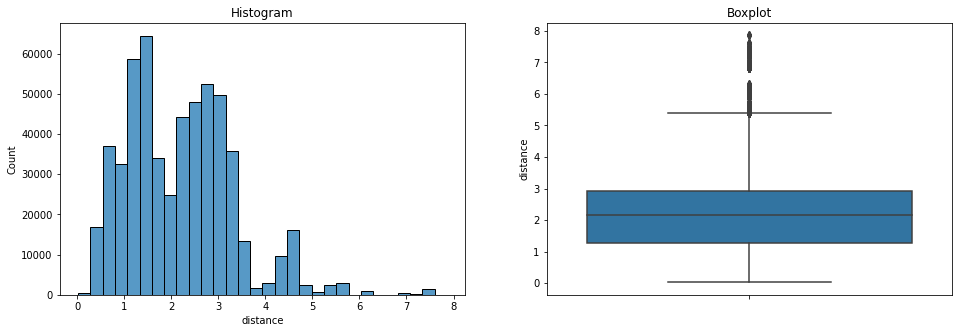



Skewness value :  0.8311930511388307


In [27]:
# XTrain Visualization
diagnostic_plots(X_train, 'distance')
print('\n')
print('Skewness value : ', X_train.distance.skew())

Data cenderung *right skew* dengan kemiringan *right extreme skewness* dengan nilai *skewness* 0.8311930511388307

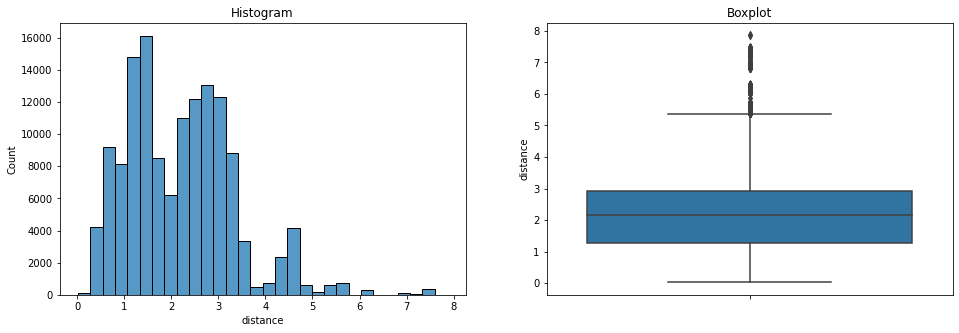



Skewness value :  0.847088231035801


In [28]:
# XTest Visualization
diagnostic_plots(X_test, 'distance')
print('\n')
print('Skewness value : ', X_test.distance.skew())

Data cenderung *right skew* dengan kemiringan *right extreme skewness* dengan nilai *skewness* 0.847088231035801

In [29]:
# Create the capper
winsorizer = Winsorizer(capping_method = 'iqr',
                          tail = 'both',
                          fold = 1.5,
                          variables=['distance'])
X_trainOutlier = winsorizer.fit_transform(X_train)
X_testOutlier = winsorizer.transform(X_test)

In [30]:
# Inspect the capper
print('Left tail caps   : ', winsorizer.left_tail_caps_)
print('Right tail caps  : ', winsorizer.right_tail_caps_)

Left tail caps   :  {'distance': -1.195}
Right tail caps  :  {'distance': 5.405}


Data *outlier* dimulai dari nilai `5.405`

In [31]:
# Describing dataset
print('XTrain before Capping')
print(X_train.describe())
print('XTrain after Capping')
print(X_trainOutlier.describe())
print('')
print('XTest before Capping')
print(X_test.describe())
print('XTest after Capping')
print(X_testOutlier.describe())

XTrain before Capping
          timestamp           hour            day          month  \
count  5.544560e+05  554456.000000  554456.000000  554456.000000   
mean   1.544046e+09      11.617539      17.785458      11.587251   
std    6.893227e+05       6.946021       9.980373       0.492329   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543738e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

            distance  surge_multiplier       latitude      longitude  \
count  554456.000000     554456.000000  554456.000000  554456.000000   
mean        2.189311          1.013928      42.338189     -71.066170   
std         1.138288          0.091897       0.047813       0.020308   
min         0.020000          1.000000      42.214800     -71.105400   
25%  

XTrain before Capping


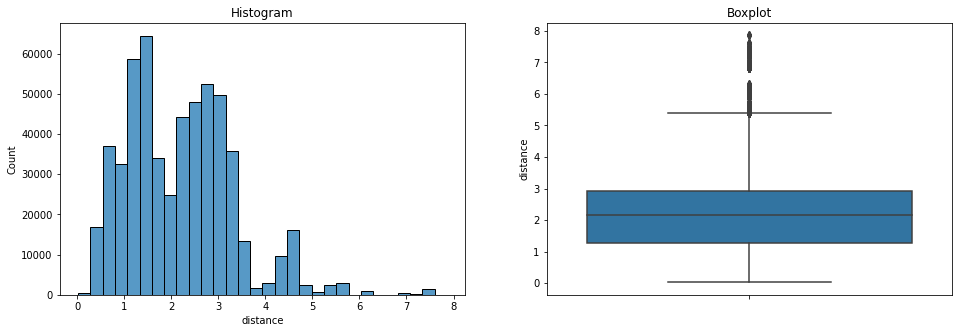


XTrain after Capping


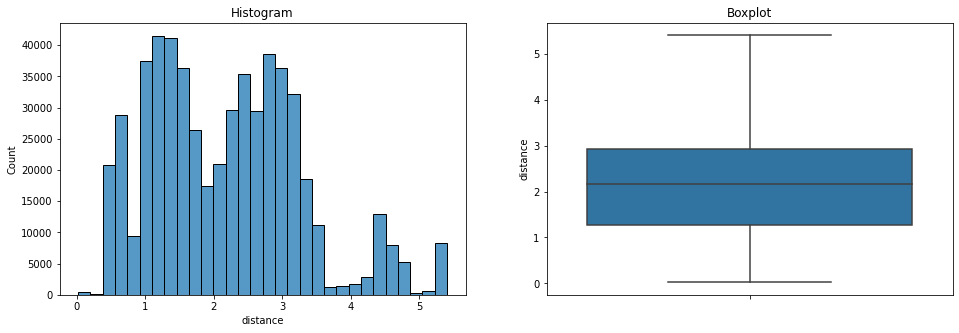


XTest before Capping


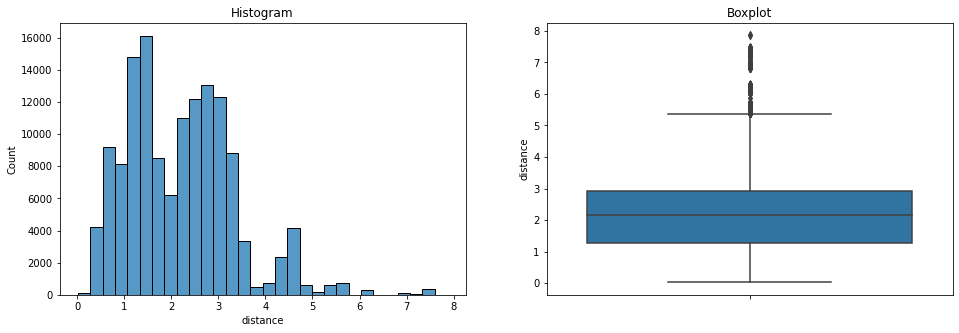


XTest after Capping


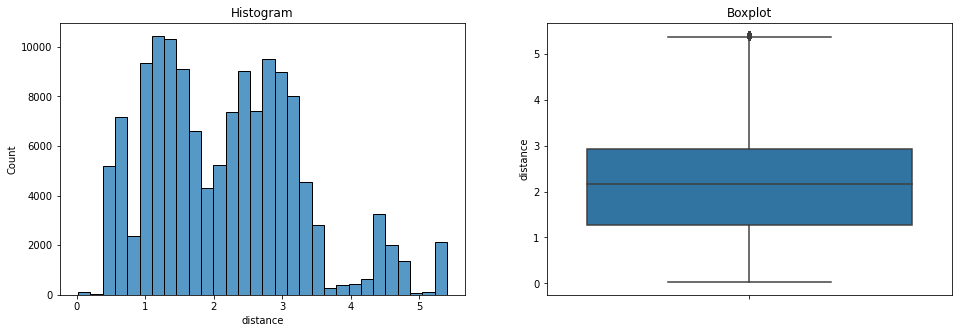

In [32]:
# Capping Visualization
print('XTrain before Capping')
diagnostic_plots(X_train, 'distance')
print('\nXTrain after Capping')
diagnostic_plots(X_trainOutlier, 'distance')
print('\nXTest before Capping')
diagnostic_plots(X_test, 'distance')
print('\nXTest after Capping')
diagnostic_plots(X_testOutlier, 'distance')

Data *outlier* telah berhasil ditangani dengan metode *Capping/Censoring*, alasannya karena dengan metode ini kita tidak menghapus data *outlier* walaupun nantinya ada kemungkinan terjadi distorsi antar variabel

In [33]:
X_testOutlier.shape

(138615, 56)

In [34]:
X_trainOutlier.shape

(554456, 56)

Data di Train Size   :  554456 baris dan 56 kolom

Data di Test Size    :  138615 baris dan 56 kolom

## 5.5 Feature Selection

In [35]:
# Check data Train-set info
X_trainOutlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554456 entries, 59252 to 521821
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           554456 non-null  object 
 1   timestamp                    554456 non-null  float64
 2   hour                         554456 non-null  int64  
 3   day                          554456 non-null  int64  
 4   month                        554456 non-null  int64  
 5   datetime                     554456 non-null  object 
 6   timezone                     554456 non-null  object 
 7   source                       554456 non-null  object 
 8   destination                  554456 non-null  object 
 9   cab_type                     554456 non-null  object 
 10  product_id                   554456 non-null  object 
 11  name                         554456 non-null  object 
 12  distance                     554456 non-null  float64


In [36]:
# Drop column yang tidak dipakai
X_trainOutlier.drop(columns=['id', 'timestamp', 'datetime', 'timezone', 'source', 'long_summary', 'visibility', 'icon', 'temperature', 'short_summary', 'destination', 
                       'product_id', 'latitude', 'longitude', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'hour',
                       'windGust', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
                       'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 
                       'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
                       'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'name', 'day', 'month'], axis=1, inplace=True)

In [37]:
# Drop column yang tidak dipakai
X_testOutlier.drop(columns=['id', 'timestamp', 'datetime', 'timezone', 'source', 'long_summary', 'visibility', 'icon', 'temperature', 'short_summary', 'destination', 
                       'product_id', 'latitude', 'longitude', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'hour',
                       'windGust', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
                       'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 
                       'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
                       'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'name', 'day', 'month'], axis=1, inplace=True)

Ini merupakan bagian dari kolom di dataset *Train* dan *Test* yang tidak akan digunakan untuk *modelling*

In [38]:
# Displaying after drop
X_trainOutlier

,cab_type,distance,surge_multiplier
59252,Lyft,1.00,1.0
309399,Uber,4.40,1.0
640729,Uber,1.41,1.0
492712,Uber,1.04,1.0
356244,Uber,2.79,1.0
...,...,...,...
480168,Lyft,1.42,1.0
623970,Lyft,0.43,1.0
82677,Lyft,2.48,1.0
207470,Lyft,1.49,1.0


In [39]:
# Displaying Test-set after drop
X_testOutlier

,cab_type,distance,surge_multiplier
544855,Lyft,2.920,1.0
486712,Uber,2.270,1.0
674348,Lyft,2.680,1.0
380592,Uber,2.860,1.0
350100,Uber,5.405,1.0
...,...,...,...
45274,Lyft,2.890,1.0
682641,Lyft,1.500,1.0
200531,Uber,1.680,1.0
12011,Lyft,2.070,1.0


## 5.6 Split between Numerical Columns and Categorical Columns

Pada bagian ini kita akan memisahkan data yang berisi *numerical* dan *categorical*

In [40]:
# Get numerical and categorical columns
numColumn = X_trainOutlier.select_dtypes(include = np.number).columns.tolist()
catColumn = X_trainOutlier.select_dtypes(include = ['object']).columns.tolist()

print('Numerical Columns    : ', numColumn)
print('Categorical Columns  : ', catColumn)

Numerical Columns    :  ['distance', 'surge_multiplier']
Categorical Columns  :  ['cab_type']


In [41]:
# Splitting Train-set dan Test-set base on column types
X_trainNum = X_trainOutlier[numColumn]
X_trainCat = X_trainOutlier[catColumn]

X_testNum = X_testOutlier[numColumn]
X_testCat = X_testOutlier[catColumn]

In [42]:
# Displaying data numerical
X_trainNum

,distance,surge_multiplier
59252,1.00,1.0
309399,4.40,1.0
640729,1.41,1.0
492712,1.04,1.0
356244,2.79,1.0
...,...,...
480168,1.42,1.0
623970,0.43,1.0
82677,2.48,1.0
207470,1.49,1.0


Ada `554,456` data di Train-set

## 5.7 Feature Scaling

Pada bagian ini kita akan menggunakan feature scaling untuk data *Train-set*

In [43]:
# Data XTrainNum describe
X_trainNum.describe()

,distance,surge_multiplier
count,554456.000000,554456.000000
mean,2.179773,1.013928
std,1.104148,0.091897
min,0.020000,1.000000
25%,1.280000,1.000000
50%,2.160000,1.000000
75%,2.930000,1.000000
max,5.405000,3.000000


note : untuk data diatas diambil pada bulan November dan Desember dengan maximal `distance` ada pada nilai `5.405` dan `surge_multiplier` maximal `3.00` dengan rata-rata `price` di `13.50`

In [44]:
# Feature Scalling dengan MinMaxScaller
scaler = MinMaxScaler()
scaler.fit(X_trainNum)

X_trainNumScaled = scaler.transform(X_trainNum)
X_testNumScaled = scaler.transform(X_testNum)
X_trainNumScaled

array([[0.181987  , 0.        ],
       [0.81337047, 0.        ],
       [0.25812442, 0.        ],
       ...,
       [0.45682451, 0.        ],
       [0.2729805 , 0.        ],
       [0.49767874, 0.        ]])

In [45]:
print('Banyak data di Train-set Numerical = ', X_trainNumScaled.shape)

Banyak data di Train-set Numerical =  (554456, 2)


## 5.8 Feature Encoding

Pada bagian ini kita akan meng-encoding data *categorical* dengan menggunakan *Ordinal Encoding*. Alasannya karena hanya ada 2 jenis layanan untuk kolom `cab_type` yaitu *Lyft* dan *Uber*

In [46]:
# Display data XTrainCat 
X_trainCat

,cab_type
59252,Lyft
309399,Uber
640729,Uber
492712,Uber
356244,Uber
...,...
480168,Lyft
623970,Lyft
82677,Lyft
207470,Lyft


Ada `554,456` baris data di *Train-Set* kategori *Categorical*

In [47]:
# Check unique value column cab_type
X_trainCat.cab_type.unique()

array(['Lyft', 'Uber'], dtype=object)

In [48]:
# Ordinal Encoder on data Train & data Test
encoder = OrdinalEncoder(categories=[['Lyft', 'Uber']])
encoder.fit(X_trainCat)
X_trainCatEnc = encoder.transform(X_trainCat)
X_testCatEnc = encoder.transform(X_testCat)

In [49]:
# Display after Encoder
X_trainCatEnc

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

ini adalah hasil *label encoding* dari kolom `cab_type` 

In [50]:
# Display after Encoder
print('Panjang data Test setelah di Scalling : ', X_testNumScaled.shape)

Panjang data Test setelah di Scalling :  (138615, 2)


## 5.9 Concate Between Numerical Column and Categorical Column

In [51]:
# Concate Column
X_trainFinal = np.concatenate([X_trainNumScaled, X_trainCatEnc], axis=1)
X_testFinal = np.concatenate([X_testNumScaled, X_testCatEnc], axis=1)

# Displaying
X_trainFinal

array([[0.181987  , 0.        , 0.        ],
       [0.81337047, 0.        , 1.        ],
       [0.25812442, 0.        , 1.        ],
       ...,
       [0.45682451, 0.        , 0.        ],
       [0.2729805 , 0.        , 0.        ],
       [0.49767874, 0.        , 1.        ]])

In [52]:
# Create dataframe to XTrainFinal
X_trainFinalDF = pd.DataFrame(X_trainFinal, columns=[numColumn + catColumn])
X_trainFinalDF

,distance,surge_multiplier,cab_type
0,0.181987,0.0,0.0
1,0.813370,0.0,1.0
2,0.258124,0.0,1.0
3,0.189415,0.0,1.0
4,0.514392,0.0,1.0
...,...,...,...
554451,0.259981,0.0,0.0
554452,0.076137,0.0,0.0
554453,0.456825,0.0,0.0
554454,0.272981,0.0,0.0


#6 - Model Definition

---



In [53]:
# # Train using linear regression
modelLinReg = LinearRegression()

1. Algoritma yang akan dipakai adalah *Linear Regression*
  - Karena *Linear Regression* tergolong mudah diaplikasikan dan dapat digunakan untuk membuat estimasi atau prediksi hubungan antara variabel *Independent* dan *Dependent* yang ada dalam data melalui titik data garis lurus. Analisis Regresi digunakan dalam penelitian untuk melihat dan menetapkan adanya korelasi antar variable.
  - Jumlah data pada X (*features*) dan y (*target*) harus sama, karena jika tidak sama, tidak akan bisa dilakukan train-test split data

2. Metrics yang akan dipakai adalah *Mean Absolute Error (MAE)*
  - Karena *Mean Absolute Error* lebih mudah direpresentasikan oleh non-team *Data Science* karena menggunakan nilai error dari rata-rata data
  - *Mean Absolute Error* lebih bisa diandalkan akurasinya dalam menangani *error*

#7 - Model Training

---



In [71]:
# Train the model dengan Linear Regression
modelLinReg.fit(X_trainFinal, y_train)

LinearRegression()

#8 - Model Evaluation

---



In [72]:
# Predict Train-set and Test-set
y_predTrain = modelLinReg.predict(X_trainFinal)
y_predTest = modelLinReg.predict(X_testFinal)

# Displaying
y_predTrain

array([[13.53485457],
       [21.77250061],
       [13.86580127],
       ...,
       [17.44853852],
       [14.83060128],
       [17.27705283]])

In [73]:
# Data pada test
y_predTest

array([[18.61206618],
       [16.13996897],
       [17.97741473],
       ...,
       [14.57978416],
       [16.36434229],
       [18.65213097]])

In [74]:
# Nilai mean pada Train-set dan Test-set
print('Value Mean Train   : ', np.mean(y_train))
print('Value Mean Test    : ', np.mean(y_test))

Value Mean Train   :  price_random    16.538806
dtype: float64
Value Mean Test    :  price_random    16.564816
dtype: float64


In [75]:
# Model Evaluation using MAE
print('Error - Train-set  : ', mean_absolute_error(y_train, y_predTrain))
print('Error - Test-set   : ', mean_absolute_error(y_test, y_predTest))

Error - Train-set  :  7.008701991149583
Error - Test-set   :  7.0179900850942785


Statement : 
1. Model termasuk *Underfitting* dikarenakan nilai dari *Mean Absolute Error* yang masih tergolong besar, hal ini dikarenakan adanya nilai bias akibat *Missing Value* yang diinput dengan metode *Random Forest*. Mungkin akan bernilai lain jika kita menanganinya dengan metode imputasi yang lain.
2. Terkait dengan *Bussiness Model* maka ini kemungkinan akan berpengaruh terhadap pemesanan untuk masing-masing layanan baik untuk *Lyft* maupun *Uber*. Karena nilai aktual dan prediksi bisa lebih tinggi atau lebih rendah, bisa mengakibatkan para pelanggan bisa merasa kebingungan terhadap masing-masing layanan.
3. Hal unik yang ada bisa terjadi karena adanya kesalahan dalam imputasi, *scalling method* dan *encoding method*. jika menggunakan imputasi, *scalling method* dan *encoding method* yang lain maka mungkin akan berbeda lagi hasil prediksinya.

#9 - Model Saving

---



In [76]:
# Saving the file
with open('modelLinReg.pkl', 'wb') as file1:
  pickle.dump(modelLinReg, file1)

with open('model_scaler.pkl', 'wb') as file2:
  pickle.dump(scaler, file2)

with open('model_encoder.pkl', 'wb') as file3:
  pickle.dump(encoder, file3)

with open('listNumCol.txt', 'w') as file4:
  json.dump(numColumn, file4)

with open('listCatCol.txt', 'w') as file5:
  json.dump(catColumn, file5)

Berikut cara untuk *export* fitur model, *scaling* dan *encoding* agar dapat digunakan lagi nantinya

#10 - Model Inference

---



In [87]:
# Buat data sampel untuk kemudian diterapkan prediksinya
infData = copyData.sample(15, random_state=6)
infData

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
692446,07fa655a-6d14-493d-a327-82b9975f23fd,1.543622e+09,23,30,11,2018-11-30 23:48:04,America/New_York,Financial District,South Station,Uber,...,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
569302,989cd358-bd98-4721-8f44-d5545bace91d,1.543550e+09,3,30,11,2018-11-30 03:48:05,America/New_York,Financial District,Haymarket Square,Lyft,...,0.0000,1543510800,35.02,1543550400,44.80,1543510800,30.81,1543550400,38.51,1543510800
8909,2d0fe69e-4a02-4dff-8d06-0d8728dc9525,1.545150e+09,16,18,12,2018-12-18 16:25:09,America/New_York,Financial District,Boston University,Lyft,...,0.0028,1545152400,23.26,1545192000,38.11,1545109200,11.99,1545134400,32.05,1545109200
537514,3423fd48-90f5-4ade-bdf5-e1041a0eb914,1.545156e+09,18,18,12,2018-12-18 18:00:09,America/New_York,North Station,Haymarket Square,Lyft,...,0.0028,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.92,1545109200
585253,b408b575-3120-4ca3-ab7b-54577f04d357,1.543341e+09,17,27,11,2018-11-27 17:51:23,America/New_York,Fenway,Financial District,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
455664,1b2ace02-9644-4b61-89a2-766764c5f780,1.543829e+09,9,3,12,2018-12-03 09:18:04,America/New_York,North Station,Boston University,Lyft,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
92134,789f1a48-6800-441e-893f-8a9f1edc23e4,1.543527e+09,21,29,11,2018-11-29 21:33:03,America/New_York,South Station,Back Bay,Uber,...,0.0000,1543510800,35.12,1543550400,44.76,1543510800,30.85,1543550400,38.44,1543510800
98939,48a12c63-427e-4757-921e-2caedc9d6ef7,1.543899e+09,4,4,12,2018-12-04 04:48:02,America/New_York,Financial District,North End,Lyft,...,0.0004,1543852800,43.10,1543896000,56.89,1543852800,40.05,1543896000,56.22,1543852800
461141,2d87519c-9686-4d1d-9d12-f36e2bf0ec01,1.544958e+09,10,16,12,2018-12-16 10:55:10,America/New_York,North Station,Fenway,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
356228,dc2d93b2-1776-4d31-ae03-580179369cbc,1.544868e+09,10,15,12,2018-12-15 10:00:10,America/New_York,Back Bay,Fenway,Lyft,...,0.0087,1544893200,39.44,1544929200,54.38,1544896800,36.56,1544929200,53.71,1544896800


data sampel sebanyak 15 yang diambil secara acak

In [88]:
# Drop column yang tidak dipakai
infData.drop(columns=['id', 'timestamp', 'datetime', 'timezone', 'source', 'long_summary', 'visibility', 'icon', 'temperature', 'short_summary', 'destination', 
                       'product_id', 'latitude', 'longitude', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'hour',
                       'windGust', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
                       'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 
                       'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
                       'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'name', 'day', 'month'], axis=1, inplace=True)

ini adalah kolom yang tidak digunakan untuk model prediksi 

In [89]:
# Mereset index dataframe
infData = infData.reset_index()

# Drop Index sebelumnya
infData = infData.drop(columns=['index'], axis=1)

# Displaing dataframe
infData

,cab_type,price,distance,surge_multiplier
0,Uber,8.5,0.39,1.00
1,Lyft,16.5,1.15,1.25
2,Lyft,38.5,5.34,1.00
3,Lyft,16.5,0.72,1.00
4,Lyft,22.5,4.33,1.00
5,Lyft,22.5,3.09,1.00
6,Uber,NaN,1.89,1.00
7,Lyft,3.5,1.01,1.00
8,Uber,18.5,3.05,1.00
9,Lyft,16.5,1.40,1.00


Membuat dataframe untuk data sampel yang telah di *scaling* dan *encoding* agar lebih baik untuk disajikan

In [90]:
# Splitting Data Inference to Numerical and Categorical
dataInfNum = infData[numColumn]
dataInfCat = infData[catColumn]
dataInfNum

,distance,surge_multiplier
0,0.39,1.00
1,1.15,1.25
2,5.34,1.00
3,0.72,1.00
4,4.33,1.00
5,3.09,1.00
6,1.89,1.00
7,1.01,1.00
8,3.05,1.00
9,1.40,1.00


Ini adalah hasil *split* data *Numerical*

In [91]:
# Data Categorical
dataInfCat

,cab_type
0,Uber
1,Lyft
2,Lyft
3,Lyft
4,Lyft
5,Lyft
6,Uber
7,Lyft
8,Uber
9,Lyft


Ini adalah hasil *split* data *Categorical*

In [92]:
# Feature Scalling and Encoding
dataInfNumScaled = scaler.transform(dataInfNum)
dataInfCatEncoded = encoder.transform(dataInfCat)
dataInfFinal = np.concatenate([dataInfNumScaled, dataInfCatEncoded], axis=1)
dataInfFinal

array([[0.06870938, 0.        , 1.        ],
       [0.20984215, 0.125     , 0.        ],
       [0.98792943, 0.        , 0.        ],
       [0.12999071, 0.        , 0.        ],
       [0.8003714 , 0.        , 0.        ],
       [0.57010214, 0.        , 0.        ],
       [0.34726091, 0.        , 1.        ],
       [0.18384401, 0.        , 0.        ],
       [0.56267409, 0.        , 1.        ],
       [0.25626741, 0.        , 0.        ],
       [0.57938719, 0.        , 0.        ],
       [0.37883008, 0.        , 0.        ],
       [0.09656453, 0.        , 1.        ],
       [0.06128134, 0.        , 1.        ],
       [0.26740947, 0.        , 0.        ]])

In [93]:
# Predicting data
yPredInf = modelLinReg.predict(dataInfFinal)
yPredInf

array([[11.1685326 ],
       [19.37120426],
       [25.01146832],
       [12.79442787],
       [22.34064346],
       [19.06161096],
       [15.13510418],
       [13.56129838],
       [18.20258619],
       [14.59260699],
       [19.19383001],
       [16.33789848],
       [11.56518976],
       [11.06275736],
       [14.75126985]])

In [94]:
# Buat predict dataframe 
yPredInfDF = pd.DataFrame(yPredInf, columns=['Predict Price'])
yPredInfDF

,Predict Price
0,11.168533
1,19.371204
2,25.011468
3,12.794428
4,22.340643
5,19.061611
6,15.135104
7,13.561298
8,18.202586
9,14.592607


Ini adalah nilai dari hasil prediksi dengan menggunakan *Linear Regression*

In [95]:
# Grouping data sample dengan data predict
finalPredDF = pd.concat([infData, yPredInfDF], axis=1)
finalPredDF

,cab_type,price,distance,surge_multiplier,Predict Price
0,Uber,8.5,0.39,1.00,11.168533
1,Lyft,16.5,1.15,1.25,19.371204
2,Lyft,38.5,5.34,1.00,25.011468
3,Lyft,16.5,0.72,1.00,12.794428
4,Lyft,22.5,4.33,1.00,22.340643
5,Lyft,22.5,3.09,1.00,19.061611
6,Uber,NaN,1.89,1.00,15.135104
7,Lyft,3.5,1.01,1.00,13.561298
8,Uber,18.5,3.05,1.00,18.202586
9,Lyft,16.5,1.40,1.00,14.592607


Dari dataframe diatas untuk `predict price` dengan `price` terdapat selisih sekitar `2.6`, tetapi ada juga selisih tinggi dengan nilai `15.14`. Selisih ini terjadi karena kemungkinan adanya kesalahan dalam pengambilan variable independent dan variable dependent dalam penentuan analisis. Kesalahan prediksi ini mungkin terjadi karena adanya kesalahan teknik imputasi yang dengan menggunakan metode *Random Forest Imputation*

In [96]:
# Get Intercept and Slope
print('Intercept  : ', modelLinReg.intercept_)
print('Slope      : ', modelLinReg.coef_)

Intercept  :  [10.94336114]
Slope      :  [[14.23999195 43.51754026 -0.75324953]]


#11 - Kesimpulan

---



Berdasarkan data-data dan permodelan diatas dapat disimpulkan:

1. Total perjalan selama bulan November - Desember untuk *Lyft* sepanjang `672,293.79` dan *Uber* sepanjang `845136.48` dengan total nilai pemesanan sebanyak `5,333,957.98` untuk *Lyft* dan `5,221,435.00` untuk *Uber*
2. Persebaran data `price` tidak terdistribusi dengan normal karena datanya cenderung *Right Extreme Skewness*, hal ini dibuktikan dengan nilai *skewness* yang dibuktikan diatas 1, yaitu **1.0457470560899256**
3. Selisih nilai mean antara data Train dan Test tidak terlalu besar
4. Nilai *Mean Absolute Error* dari masing data Train dan data Testnya pun hampir sama besar
5. Model-model yang digunakan untuk train adalah *Linear Regression*, dan jika menggunakan model yang lain maka kemungkinan akan berbeda untuk hasil prediksinya
6. Untuk *Further Improvement* maka jika memungkinkan kita akan melakukan uji test dengan metoda yang lain. Dari database mungkin bisa lebih disederhanakan lagi untuk data jumlah kolom datanya, karena ada beberapa kolom yang tidak digunakan seperti pembagian kondisi cuaca. Mungkin bisa lebih spesifik untuk perhitungan yang berkaitan dengan estimasi perjalanan.